# Case 1: Generate Model Scripts

In [1]:
using BOMBs

Just to print the nice BOMBS logo

In [2]:
printBOMBsLogo()


                      ___________   __________   ___  ___   ___________   __________
                     /  _____   /  / ______  /  /   \/   \  \   _____  \  \  _______\
                    /  /____/  /  / /     / /  /          \  \  \____\  \  \ \________
                   /  _____   /  / /     / /  /            \  \   _____  \  \________ \
                  /  /    /  /  / /     / /  /   /\____/\   \  \  \    \  \          \ \
                 /  /____/  /  / /_____/ /  /   /        \   \  \  \____\  \   _______\ \
                /__________/  /_________/  /__ /          \___\  \__________\  \_________\

                


### This function gives you information about the structure necessary to generate the model and how to call it. 
If you do not know how to call a specific section, just call the function with no input (infoAll()) to get the information.

In [3]:
infoAll("model")



                CALL defModStruct()

model_def["NameF"] = [];
        # String containing the name of the model. Scripts and results will be stored using this name

model_def["nStat"] = [];
        # Integer indicating the total number of steps of the model.

model_def["nPar"] = [];
        # Integer indicating the total number of parameters of the model.

model_def["nInp"] = [];
        # Integer indicating the total number of stimuli (inducers) of the model

model_def["stName"] = [];
        # Vector of strings indicating the name of all the states of the model (without a d letter in front).

model_def["parName"] = [];
        # Vector of strings indicating the name of all the parameters of the model.

model_def["inpName"] = [];
        # Vector of strings indicating the name of all the stimuli (inducers) of the model

model_def["eqns"] = [];
        # Vector of strings containing all the equations for the model (left and right hand sides).
        # If an equation represents a sta

Generate the empty dictionary with the model_def structure

In [4]:
model_def = defModStruct()

Dict{Any,Any} with 12 entries:
  "stName"  => Any[]
  "inpName" => Any[]
  "solver"  => Any[]
  "nPar"    => Any[]
  "NameF"   => Any[]
  "nInp"    => Any[]
  "nStat"   => Any[]
  "eqns"    => Any[]
  "Y0eqs"   => Any[]
  "Y0Sim"   => Any[]
  "parName" => Any[]
  "tols"    => Any[]

Fill the different elements of the dictionary with your model specifications. See above how ^

In [5]:
model_def["NameF"] = ["PLacExample"];
model_def["nStat"] = [4];
model_def["nPar"] = [9];
model_def["nInp"] = [1];
model_def["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def["inpName"] = ["IPTG"];

model_def["parName"] = ["alpha1","Vm1","h1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];
model_def["eqns"] = ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def["Y0eqs"] = ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def["Y0Sim"] = [];
model_def["tols"] = [1e-9, 1e-9];
model_def["solver"] = "CVODE_BDF";

Generate the scripts with the ODEs and the step-wise implementation

In [6]:
model_def = GenerateModel(model_def)


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------------------------------------



Dict{Any,Any} with 13 entries:
  "stName"    => ["Cit_mrna", "Cit_foldedP", "Cit_fluo", "Cit_AU"]
  "modelpath" => "E:\\UNI\\D_Drive\\PhD\\JULIAlang\\Generalisation_PLacExample\…
  "inpName"   => ["IPTG"]
  "solver"    => "Tsit5"
  "nPar"      => 9
  "NameF"     => "PLacExample"
  "nInp"      => 1
  "nStat"     => 4
  "eqns"      => ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna"…
  "Y0eqs"     => ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;", "…
  "Y0Sim"     => false
  "parName"   => ["alpha1", "Vm1", "h1", "Km1", "d1", "alpha2", "d2", "Kf", "sc…
  "tols"      => [1.0e-9, 1.0e-9]

### This is the end of the section. Look at the cool logo to check the package version ;) 

In [7]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  

## Here we are going to simulate the system (NOT using the package!) to check that the generated scripts are correct

In [8]:
using Plots

In [9]:
# Specifications of the experiment 
ts = collect(0.0:Float64(24*60-1))'; # 24 hour experiment
sp = [convert(Int,v) for v in (collect(0:((24*60)/4):(24*60))')]; # 4 step experiment
sp[end] = sp[end]-1;
ivss = [0,0,0,0]; # Experimental values for Y0 (In this case this will not be used, but needs to be given, so I just added zeros)
pre = [0]; # ON inputs (IPTG)
samps = ts[1:5:end]; # Sampling time every 5 min

In [10]:
IPTGs = [5,0,10,100]; # The values of the inducer at each step

# Values for our model theta. 
theta =[0.000377125304442752*60, 0.00738924359598526*60, 1.53333782244337, 5.01927275636639,
    0.00118831480244382*60, 0.0461264539194078*60, 0.000475563708997018*60, 0.000301803966012407*60, 68.8669567134881];

In [11]:
# Since we are running things from outside the package, you will need to include the scripts generated in the path
# You can do so by running: 
include(string(model_def["modelpath"]))

PLacExample_SolveAll (generic function with 2 methods)

In [12]:
# Let's simulate the system!
# Note that you can know which is the name of the model from the information print when you called GenerateModel()
simulationExample1 = PLacExample_SolveAll(ts, theta, sp, IPTGs, ivss, samps, pre);

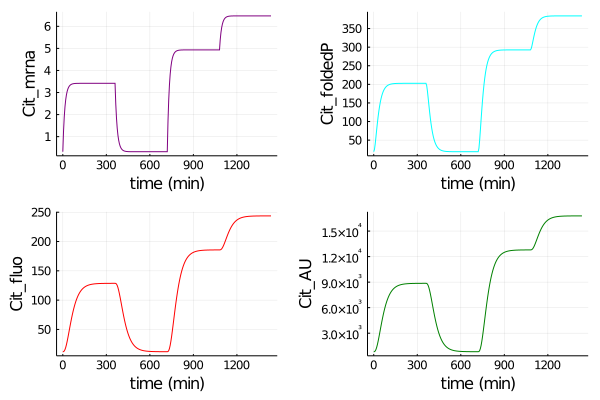

In [13]:
# Let's plot the results to see how the simulation went
plot(samps, simulationExample1[:,:,1], layout=4, label = ["" "" "" ""], xlabel = "time (min)",
        ylabel = [model_def["stName"][1] model_def["stName"][2] model_def["stName"][3] model_def["stName"][4]],
        colour = ["purple" "cyan" "red" "green"])